In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.randn(400)
b = 2*np.random.randint(-1, 1, 400) + 1    #Return random integers in the closed interval [low, high].
        
print(a[1:20], b[1:20])

In [ ]:
import numpy as np

def f1 (arg1, arg2):
    arg3 = 32
    if (arg1 & arg2) != 0:
        arg3 = arg1**2 + arg2
    else:
        arg1 = 50
        arg2 = 100
    return arg3;

a = np.array([1, 2, 3])
b = np.array([0, 1, 2])

c = f1(a[0], b[0])

print(c)

In [ ]:
import numpy as np
from numpy import zeros

a = np.array([1, 2, 3])            # input array - 3x3 
B = 2                                      # block size - 2    

def upsample(array,rate):
    ret =  zeros(rate*len(array))
    ret[::rate] = array 
    return ret

C = upsample (a, B)
print(a)

print(C)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#t = np.arange(0, 2, 0.001)
#a = np.cos(2*np.pi*t)
#plt.plot(t,a)
#plt.show()

def raisedCosFir(roff, nsCL, T):
    t = np.arange(-nsCL*T, nsCL*T, nsCL/2)
    
    freq = 1/T
    w0 = 2*freq
    w = roff*w0 + w0
    
    rcos = np.cos(((np.pi)/4)*((freq + w - 2*w0)/(w-w0))*t)
    rcos = np.sinc(t/T)*rcos**2
    return (rcos, t)

[a, t] = raisedCosFir(0.25, 4, 64)

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(t, a)
plt.xlim([min(t), max(t)])
plt.ylim([min(a) - max(a)/10, max(a) + max(a)/10])

plt.subplot(1, 2, 2)
plt.stem(t,a)
plt.xlim([min(t), max(t)])
plt.ylim([min(a) - max(a)/10, max(a) + max(a)/10])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import zeros
from numpy import ones

a = np.arange(0, 5, 1)

def upSample(array,rate):
    ret =  zeros(rate*len(array))
    
    for i in range(len(array)):
        k = 0
        for k in range(rate):
            ret[k+rate*i] = array[i]
            k = k+1
    return ret

A = upSample(a,5)

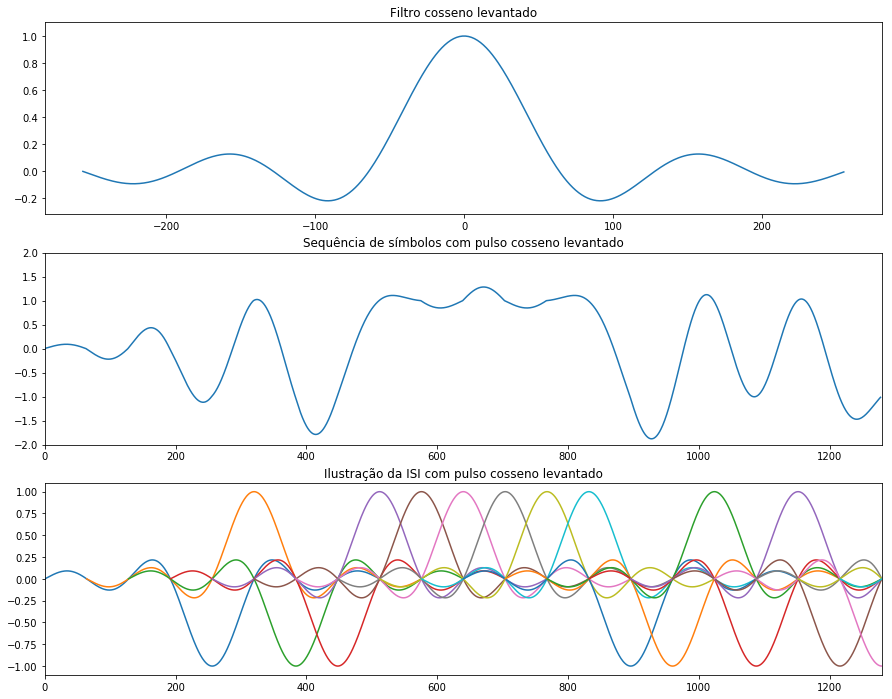

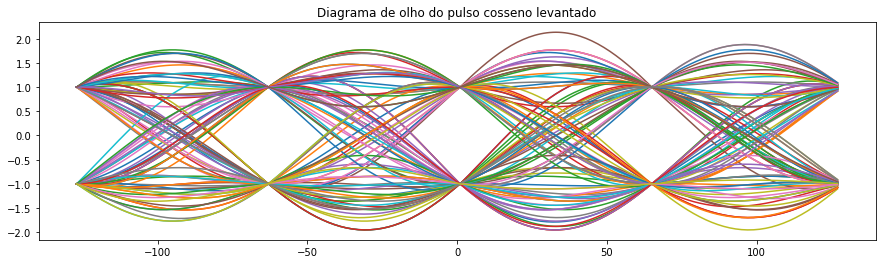

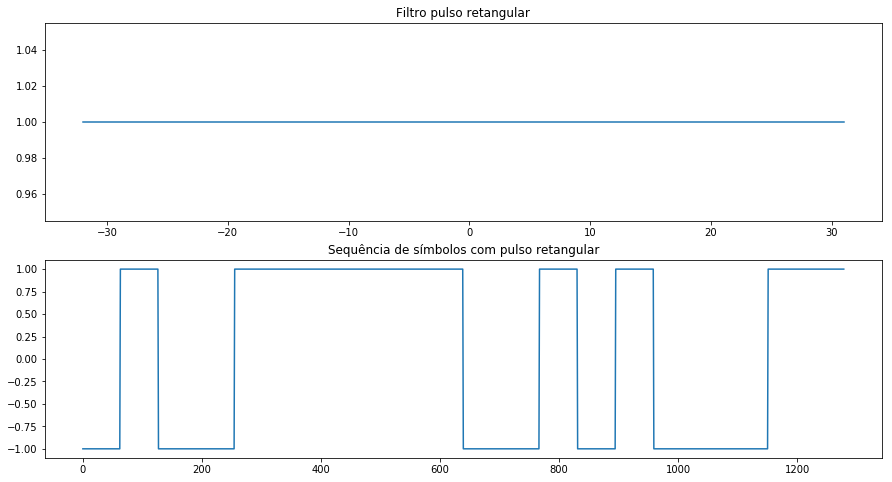

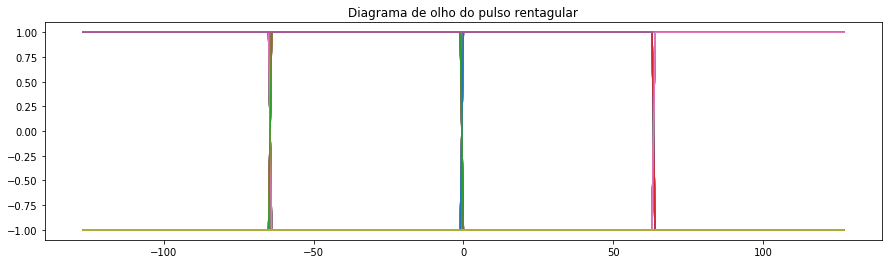

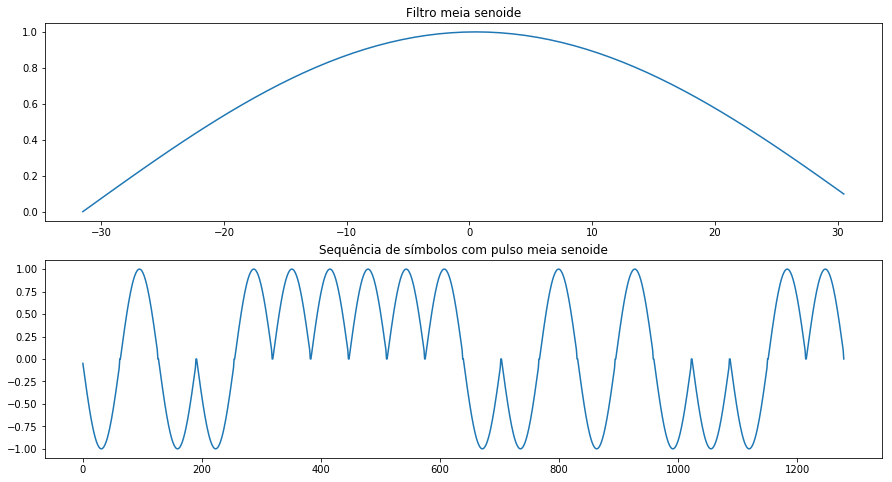

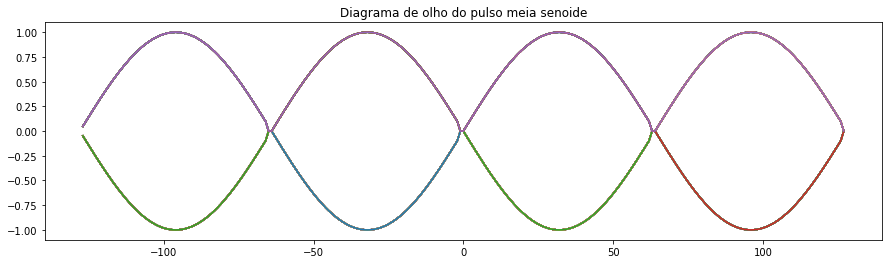

()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import zeros
from numpy import ones

# Parâmetros
peSim = 64                                                 # Período do símbolo (amostras/símbolo)
nsCL = 4                                                   # Número de símbolos o cosseno levantado se espalhará (ISI)
roff = 0.5                                                 # Fator de decaimento do cosseno levantado
nSimbs = 400                                               # Número de símbolos transmitidos 
vtSim = 2*np.random.randint(-1, 1, nSimbs) + 1             # Return random integers in the closed interval [low, high]

# Declarando funções
def upSample1(array,rate):
    ret =  zeros(rate*len(array))
    ret[::rate] = array
    return ret

def raisedCosFir(roff, nsCL, T):
    t = np.arange(-nsCL*T, nsCL*T, nsCL/4)
    freq = 1/T
    w0 = 2*freq
    w = roff*w0 + w0
    rcos = np.cos(((np.pi)/4)*((freq + w - 2*w0)/(w-w0))*t/T)
    rcos = np.sinc(t/(T))*rcos**2
    return (rcos, t)

def eyeDiagram(func, peSim, tittleA):
    nT = int((len(func)+1)/(len(peSim)*2))
    a = int(len(peSim)/2)
    plt.figure(figsize = (15, 4))
    time = np.arange(-a/2+1, a/2, 1)
    for i in (range(nT*4)):
        if i > 0:
            plt.plot(time,func[i*a:(i*a+a)-1])
    plt.title(tittleA)
    plt.show()
    return()
   
dup = upSample1(vtSim,peSim)                               # Símbolos (sobreamostragem)
[hrc, t] = raisedCosFir(roff, nsCL, peSim)                 # Cosseno levantado
yrcosAll = np.convolve(dup,hrc)                            # Símbolos transmitidos com o cosseno levantado
yrcos = yrcosAll[2*nsCL*peSim:len(yrcosAll)-2*nsCL*peSim]  # Trem de pulso cosseno levantado
nSim2Plot = 20                                             # Número de símbolos para o gráfico no tempo

# Gráfico pulso cosseno levantado
t1 = np.arange(-len(hrc)/2,len(hrc)/2,1)
plt.figure(figsize = (15, 12))
plt.subplot(3,1,1)
plt.plot(t1, hrc)
plt.ylim([min(hrc) - max(hrc)/10, max(hrc) + max(hrc)/10])
plt.title('Filtro cosseno levantado')

plt.subplot(3,1,2)
plt.plot(yrcosAll[1:nSim2Plot*peSim])
plt.title('Sequência de símbolos com pulso cosseno levantado')
plt.xlim([0, peSim*nSim2Plot])
plt.ylim([-2, 2])

# Gráfico da ISI com pulso cosseno levantado
plt.subplot(3,1,3)
nRC = len(hrc)
t = np.arange(0, nRC, 1)
for ik in range(nSim2Plot):
    plt.plot(t + (ik)*peSim, vtSim[ik]*hrc)
plt.xlim([0, peSim*nSim2Plot])
plt.title('Ilustração da ISI com pulso cosseno levantado')
plt.show()

# Gráfico do diagrama de olho com pulso cosseno levantado
title1 = ('Diagrama de olho do pulso cosseno levantado')
a = eyeDiagram(yrcosAll,t1, title1)

# Pulso retangular
hT = np.ones(len(range(peSim)))                            # Pulso retangular do transmissor (NRZ)

# Aplicando o pulso a sequência de símbolos 
ynrzAll = np.convolve(dup,hT)                              # Símbolos transmitidos com pulso retangular
ynrz = ynrzAll[1:len(ynrzAll)-peSim+1]                     # retira o último símbolo  

# Gráfico pulso rentangular
yrcosAll[2*nsCL*peSim:len(yrcosAll)-2*nsCL*peSim]
thT = np.arange(-peSim/2,peSim/2,1)
plt.figure(figsize = (15, 8))
plt.subplot(2,1,1)
plt.plot(thT,hT);
plt.title('Filtro pulso retangular')

plt.subplot(2,1,2)                                         # Número de símbolos para o gráfico no tempo
plt.plot(ynrzAll[1:nSim2Plot*peSim])
plt.title('Sequência de símbolos com pulso retangular')
plt.show()

# Diagrama de olho
title2 = ('Diagrama de olho do pulso rentagular')
eyeDiagram(ynrz,t1,title2)                                 # Diagrama de olho do cosseno levantado

# Pulso meia senoide
hSin = np.sin(np.pi*(np.arange(0, peSim-1, 1))/peSim)   # Pulso meia senoide

# Aplicando o pulso a sequência de símbolos 
ysinAll = np.convolve(dup,hSin)                          # Símbolos transmitidos com pulso meia senoide
ysin = ysinAll[1:len(ysinAll)-peSim+1]                    # retira o último símbolo  

# gráfico pulso meia senoide
t2 = np.arange(-len(hSin)/2,len(hSin)/2,1)
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.plot(t2, hSin)
plt.title('Filtro meia senoide')

plt.subplot(2,1,2)                                    # Número de símbolos para o gráfico no tempo
plt.plot(ysinAll[1:nSim2Plot*peSim]);
plt.title('Sequência de símbolos com pulso meia senoide');

# Diagrama de olho
title3 = ('Diagrama de olho do pulso meia senoide')
eyeDiagram(ysin, t1, title3)                   # Diagrama de olho do pulso meia senoide

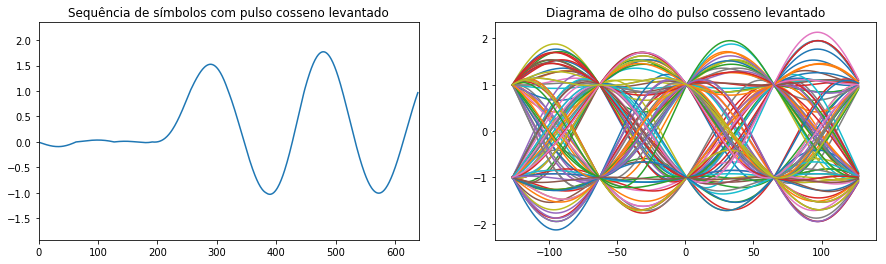

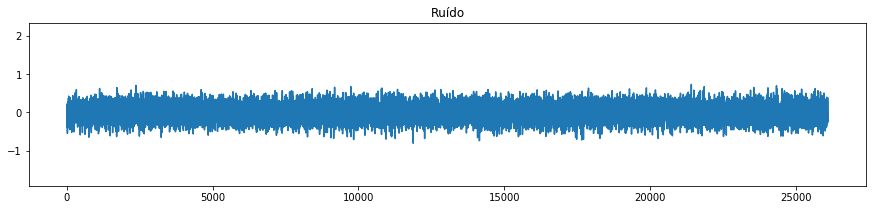

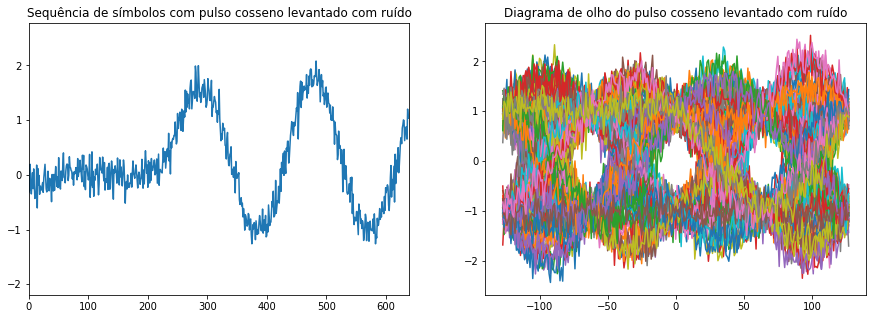

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import zeros
from numpy import ones

# Parâmetros
peSim = 64                                                 # Período do símbolo (amostras/símbolo)
nsCL = 4                                                   # Número de símbolos o cosseno levantado se espalhará (ISI)
roff = 0.5                                                 # Fator de decaimento do cosseno levantado
nSimbs = 400                                               # Número de símbolos transmitidos 
vtSim = 2*np.random.randint(-1, 1, nSimbs) + 1             # Return random integers in the closed interval [low, high]

EbNo_dB = 30                                      # Eb/No da simulação (somente um valor)
EbNo = 10**(EbNo_dB/10)                            # Eb/No em escala linear
T = 0.1                                           # Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T /(64)                                      # Tempo de amostragem do pulso (amostras/seg)


# Declarando funções
def upSample1(array,rate):
    ret =  zeros(rate*len(array))
    ret[::rate] = array
    return ret

def raisedCosFir(roff, nsCL, T):
    t = np.arange(-nsCL*T, nsCL*T, nsCL/4)
    freq = 1/T
    w0 = 2*freq
    w = roff*w0 + w0
    rcos = np.cos(((np.pi)/4)*((freq + w - 2*w0)/(w-w0))*t/T)
    rcos = np.sinc(t/(T))*rcos**2
    return (rcos, t)

def eyeDiagram(func, peSim, tittleA):
    nT = int((len(func)+1)/(len(peSim)*2))
    a = int(len(peSim)/2)
    #plt.figure(figsize = (15, 4))
    time = np.arange(-a/2+1, a/2, 1)
    for i in (range(nT*4)):
        if i > 0:
            plt.plot(time,func[i*a:(i*a+a)-1])
    plt.title(tittleA)
    plt.show()
    return()

dup = upSample1(vtSim,peSim)                               # Símbolos (sobreamostragem)
[hrc, t] = raisedCosFir(roff, nsCL, peSim)                 # Cosseno levantado
yrcosAll = np.convolve(dup,hrc)                            # Símbolos transmitidos com o cosseno levantado
yrcos = yrcosAll[2*nsCL*peSim:len(yrcosAll)-2*nsCL*peSim]  # Trem de pulso cosseno levantado                                           # Número de símbolos para o gráfico no tempo

t1 = np.arange(-len(hrc)/2,len(hrc)/2,1)
nSim2Plot = 10

# Canal AWGN 
Eb = sum(hrc**2)/len(hrc)
No = Eb/EbNo
vtN = np.sqrt(1/Ts*No/2)*np.random.randn(len(yrcosAll))       # Return random integers in the closed interval [low, high]

# Sinal recebido com ruído AWGN
yrcosAlln =  yrcosAll + vtN 
yrcosn = yrcos + vtN[2*nsCL*peSim:len(vtN)-2*nsCL*peSim]

plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(yrcosAll[1:nSim2Plot*peSim])
plt.title('Sequência de símbolos com pulso cosseno levantado')
plt.xlim([0, peSim*nSim2Plot])
plt.ylim([min(yrcosAll) - min(yrcosAll)/10, max(yrcosAll) + max(yrcosAll)/10])

# Gráfico do diagrama de olho com pulso cosseno levantado
title1 = ('Diagrama de olho do pulso cosseno levantado')
plt.subplot(1,2,2)
a = eyeDiagram(yrcosAll, t1, title1)
plt.show()

tRuido = np.arange(0,len(vtN), 1)
plt.figure(figsize = (15,3))
plt.plot(tRuido, vtN)
plt.ylim([min(yrcosAll) - min(yrcosAll)/10, max(yrcosAll) + max(yrcosAll)/10])
plt.title('Ruído')

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(yrcosAlln[1:nSim2Plot*peSim])
plt.title('Sequência de símbolos com pulso cosseno levantado com ruído')
plt.xlim([0, peSim*nSim2Plot])
plt.ylim([min(yrcosAlln) - min(yrcosAlln)/10, max(yrcosAlln) + max(yrcosAlln)/10])

plt.subplot(1,2,2)
title1 = ('Diagrama de olho do pulso cosseno levantado com ruído')
a = eyeDiagram(yrcosAlln, t1, title1)
plt.show()


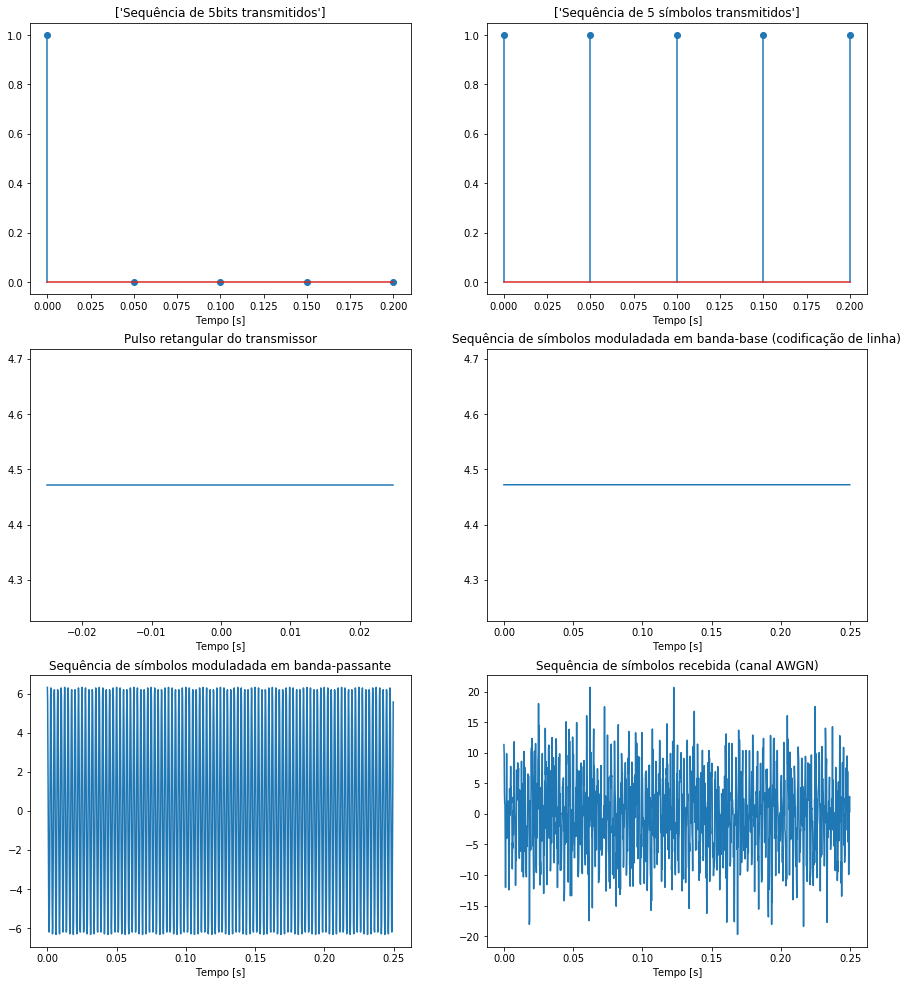

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import zeros
from numpy import ones

# Declarando funções
def upSample1(array,rate):
    ret =  zeros(rate*len(array))
    ret[::rate] = array
    return ret

# Parâmetros
EbNo_dB = 20                                   # Eb/No da simulação (somente um valor)
EbNo = 10**(EbNo_dB/10)                        # Eb/No em escala linear

# Transmitir 1 quadro de Na bits com nSamp amostras
Na = 1000                                      # Número de bits por quadro
nAmoSim = 256                                  # Número de amostras por símbolo 
T = 0.05                                       # Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T/nAmoSim                                 # Tempo de amostragem do pulso (amostras/seg)
Ns = Na*nAmoSim                                # Número de amostras
t = np.arange(0,Ns-1,1)*Ts                     # Eixo do tempo 

# Transmissor
vtSimbolos = [-1, 1]                           # Símbolos (BPSK)
vtBin = (np.random.randint(-1, 1, Na))+1       # Vetor com bits

# Energia do bit
vtSimbolos2 = zeros(len(vtSimbolos))
for i in range(len(vtSimbolos)):
    vtSimbolos2[i] = vtSimbolos[i]**2
Eb = (sum(vtSimbolos2))/len(vtSimbolos2)
vtTxSim = vtSimbolos2[vtBin]                                 # Mapeamento bit para símbolo

# Codificação de linha (modulação em banda-base)
hT = 1/(np.sqrt(T)*ones(nAmoSim))                            # Pulso retangular do transmissor (NRZ)

# Aplicando o pulso a sequência de símbolos 
vtTxBB = np.convolve(upSample1(vtTxSim, nAmoSim), hT)        
vtTxBB = vtTxBB[1:Ns]                                        # Truncando para o número de amostras original 

# Modulação em banda-passante
fc = 400                                                     # Frequência da portadora [Hz]
vtTxBP = vtTxBB*np.sqrt(2)*np.cos(2*np.pi*fc*t)              # Modulator (portadora de potência 1)

# Canal AWGN 
No = Eb/EbNo

# Sinal recebido
vtRxBP =  vtTxBP + np.sqrt(1/Ts*No/2)*np.random.randn(len(vtTxBP))

# Gráficos
nPontos = 5                                                  # Plotar somente os nPontos iniciais

# Bits
plt.figure(figsize = (15,35))
plt.subplot(6,2,1)
tBits = np.arange(0,nPontos*T,T)
plt.stem(tBits,vtBin[0:nPontos])
plt.title(['Sequência de ' + str(nPontos) + 'bits transmitidos'])
plt.xlabel('Tempo [s]')

# Símbolos
plt.subplot(6,2,2)
tSim = np.arange(0,nPontos*T,T)
plt.stem(tSim,vtTxSim[0:nPontos])
plt.title(['Sequência de ' + str(nPontos) + ' símbolos transmitidos'])
plt.xlabel('Tempo [s]')

# Pulso
plt.subplot(6,2,3)
thT = np.arange(-Ts*(nAmoSim/2), Ts*nAmoSim/2, Ts)
plt.plot(thT,hT)
plt.title('Pulso retangular do transmissor')
plt.xlabel('Tempo [s]')

# Codificador de linha (modulação em banda-base)
plt.subplot(6,2,4);
tMod = np.arange(0, Ts*nPontos*nAmoSim, Ts)
plt.plot(tMod,vtTxBB[0:nPontos*nAmoSim])
plt.title('Sequência de símbolos moduladada em banda-base (codificação de linha)')
plt.xlabel('Tempo [s]')

# Modulador em banda-passante
plt.subplot(6,2,5)
plt.plot(tMod,vtTxBP[0:nPontos*nAmoSim])
plt.title('Sequência de símbolos moduladada em banda-passante')
plt.xlabel('Tempo [s]')

#Sinal recebido (canal AWGN)
plt.subplot(6,2,6)
plt.title('Sequência de símbolos recebida (canal AWGN)')
plt.plot(tMod,vtRxBP[0:nPontos*nAmoSim])
plt.xlabel('Tempo [s]')

plt.show()

/home/diegorp22/anaconda3/envs/py34/lib/python3.4/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


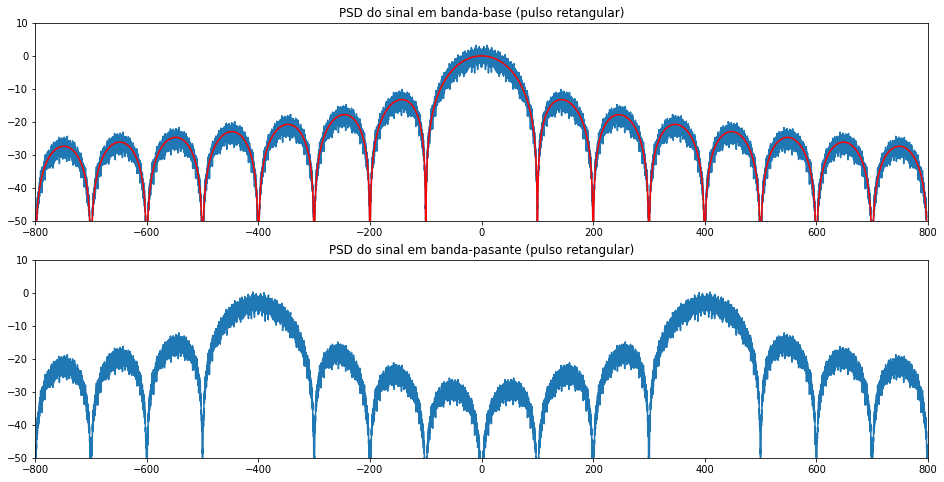

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import zeros
from numpy import ones
from scipy.fftpack import fft
from scipy.fftpack import fftshift

# Declarando funções
def upSample1(array,rate):
    ret =  zeros(rate*len(array))
    ret[::rate] = array
    return ret

# Parâmetros
EbNo_dB = 20                                   # Eb/No da simulação (somente um valor)
EbNo = 10**(EbNo_dB/10)                        # Eb/No em escala linear

# Transmitir 1 quadro de Na bits com nSamp amostras
Nf = 10
Na = 1000                                      # Número de bits por quadro
nAmoSim = 128                                  # Número de amostras por símbolo 
T = 0.01                                       # Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T/nAmoSim                                 # Tempo de amostragem do pulso (amostras/seg)
Ns = Na*nAmoSim                                # Número de amostras
t = np.arange(0,Ns-1)*Ts                       # Eixo do tempo 

vtPSDSimBB = zeros(Ns-1)                       # Vetor com a PSD simulada (estimada nos Nf quadros)-Banda-base
vtPSDSimBP = zeros(Ns-1)                       # Vetor com a PSD simulada (estimada nos Nf quadros)-Banda-passante
vtSimbolos = np.array((1,-1))

# Transmissor

for k in range(Nf):                            # Loop para cada quadro
    vtBin = (np.random.randint(-1, 1, Na))+1   # Vetor com bits
    
    # Energia do bit
    vtSimbolosT = zeros(len(vtSimbolos))
    vtSimbolosT = np.transpose(vtSimbolos)
    Eb = (sum(vtSimbolos*vtSimbolosT))/len(vtSimbolos)
    vtTxSim = vtSimbolos[vtBin]                                  # Mapeamento bit para símbolo

    # Codificação de linha (modulação em banda-base)
    hT = 1/(np.sqrt(T)*np.ones(nAmoSim))                            # Pulso retangular do transmissor (NRZ)

    # Aplicando o pulso a sequência de símbolos 
    vtTxBB = np.convolve(upSample1(vtTxSim, nAmoSim), hT)        
    vtTxBB = vtTxBB[1:Ns]                                        # Truncando para o número de amostras original 

    # Modulação em banda-passante
    fc = 400                                                     # Frequência da portadora [Hz]
    vtTxBP = vtTxBB*np.sqrt(2)*np.cos(2*np.pi*fc*t)              # Modulator (portadora de potência 1)
    
    # Estimação da PSD via fft (sinal em banda-base)
    vtSpecBB = fftshift(fft(vtTxBB))
    
    # PSD do sinal em banda-base
    c = np.conj(vtSpecBB)
    vtPSDSimBB = vtPSDSimBB + (vtSpecBB*(c))*Ts/Ns
    
    # Calcula a estimativa da PSD do sinal em banda-passante
    vtSpecBP = fftshift(fft(vtTxBP))
    vtPSDSimBP = vtPSDSimBP + (vtSpecBP*(np.conj(vtSpecBP)))*Ts/Ns 

xFreq = np.arange(-1/(2*Ts),(1/(2*Ts))-1/(Ns*Ts),1/(Ns*Ts))
plt.figure(figsize=(16,8))

# PSD teórica do pulso rentangular
VfTheo = (1/np.sqrt(T))*(T*np.sinc(T*xFreq))
PSDTheo = VfTheo**2/T

plt.subplot(2,1,1)
plt.plot(xFreq,10*np.log10(vtPSDSimBB/Nf))
plt.plot(xFreq,10*np.log10(PSDTheo),'r')
plt.title('PSD do sinal em banda-base (pulso retangular)')
plt.ylim([-50, 10])
plt.xlim([-2*fc, 2*fc])

# PSD estimada pelas amostras do sinal 
plt.subplot(2,1,2)
plt.plot(xFreq,10*np.log10(vtPSDSimBP/Nf))
plt.title('PSD do sinal em banda-pasante (pulso retangular)')
plt.ylim([-50, 10])
plt.xlim([-2*fc, 2*fc])

plt.show()


['Rodando Eb/No = -10 dB']
0
0
['Rodando Eb/No = -8 dB']
0
0
['Rodando Eb/No = -6 dB']
0
0
['Rodando Eb/No = -4 dB']
0
0
['Rodando Eb/No = -2 dB']
0
1
['Rodando Eb/No = 0 dB']
0
1
['Rodando Eb/No = 2 dB']
0
1
['Rodando Eb/No = 4 dB']
0
2
['Rodando Eb/No = 6 dB']
0
2
['Rodando Eb/No = 8 dB']
0
3


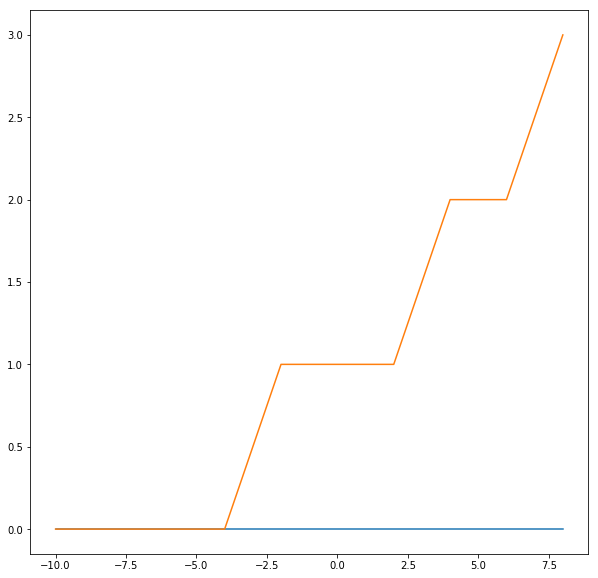

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import zeros
from numpy import ones
from scipy.fftpack import fft
from scipy.fftpack import fftshift

# Parâmetros
vtEbNodB = np.arange(-10,10,2)    # Eb/No da simulação (somente um valor)
vtEbNo = 10**(vtEbNodB/10)        # Eb/No em escala linear

# Transmitir Nf quadros de Na bits com nSamp amostras
Nf = 100
Na = 1000                          # Número de bits por quadro
nAmoSim = 128                      # Número de amostras por símbolo
T = 0.01                           # Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T/nAmoSim                     # Tempo de amostragem do pulso (amostras/seg)
Ns = Na*nAmoSim                    # Número de amostras
fc = 400                           # Frequência da portadora [Hz] - modulação em banda-passante
t = np.arange(0,Ns/Ts,1/Ts)        # Eixo do tempo

# Pulso (retangular) da modulação em banda-base (codificação de linha)
hT = 1/np.sqrt(T)*np.ones((nAmoSim,1)) # Pulso retangular do transmissor (NRZ)

# Pulso do filtro casado do receptor
hR = zeros(len(hT))
a = int(len(hT))
for i in range(a):
    hR[i] = hT[a-i-1]
hR1 = np.fliplr(hT)

# Transmissor
vtSimbolos = np.array((-1, 1))                                 # Símbolos (BPSK)

# Energia do bit
Eb = sum(vtSimbolos*np.transpose(vtSimbolos))/len(vtSimbolos)
vtBER = np.arange(0,len(vtEbNo),1)
vtPe = np.arange(0,len(vtEbNo),1)
for ni in range(len(vtEbNo)):                                  # Loop para cada Eb/No
    print(['Rodando Eb/No = ' + str(vtEbNodB[ni]) + ' dB'])
    nErrs = 0                                                  # Contador do número de bits errados
    nErrs2 = 0
    No = Eb/vtEbNo[ni]                                         # Potência do ruído
    
    for i in range(Nf):                                        # Loop para cada quadro
        vtBin = (np.random.randint(-1, 1, Na))+1               # Vetor com bits
        vtTxSim = vtSimbolos[vtBin]                            # Mapeamento bit para símbolo
        
        # Modulação em banda-base
        # Aplicando o pulso a sequência de símbolos (sinal em banda-base)
        vtTxBB = np.convolve(upSample1(vtTxSim, nAmoSim), hT[:,0])
        vtTxBB = vtTxBB[0:Ns]                                  # Truncando para o número de amostras original
        
        # Modulação em banda-passante (portadora com potência 1)
        vtTxBP = vtTxBB*np.sqrt(2)*np.cos(2*np.pi*fc*t)
        
        # Sinal recebido (anal AWGN)
        vtRxBP =  vtTxBP + np.sqrt(1/Ts*No/2)*np.random.randn(len(vtTxBP))
        
        # Receptor
        vtBB = vtRxBP*np.sqrt(2)*np.cos(2*np.pi*fc*t)          # Demodulador banda-passante
        vtFC = np.convolve(vtBB, hR1[:,0])*Ts                  # Filtro Casado (demodulação em banda-base)
        r = vtFC[1:Na]*nAmoSim                                 # Downsample (amostragem antes do decisor)
        vtBinRec = (r > 0.0)                                   # Decisor BPSK
        
        # Contagem de erros
        nErrs2 = nErrs2 + sum(np.logical_xor(vtBin[0:-2], vtBinRec[0:-1]))
    # BER (simulada)
    vtBER[ni] = nErrs2/(Na*Nf)
    vtPe[ni] = (np.sqrt(2*vtEbNo[ni]))
    
    print(vtBER[ni])
    print(vtPe[ni])
    
plt.figure(figsize=(10,10))
plt.plot(vtEbNodB, vtBER)
plt.plot(vtEbNodB, vtPe)
plt.show()
    